##### Name: Jesse Rathy
##### Student Number: 11166083
##### Course Number: CMPT 423 Section: 1


# Question 3
#### Part A

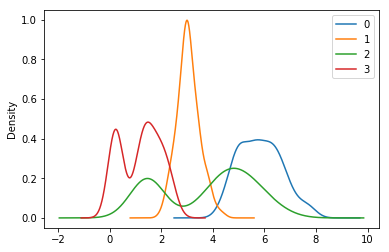

In [86]:
from sklearn.datasets import load_iris
import numpy.random as nprand
import math as math
import numpy as np
import random as rnd
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


iris = load_iris()

data_set = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

#print(iris)
#print(data_set)

iris_frame = pd.DataFrame(iris['data'])

#print(iris_frame)

iris_frame.plot.density()
plt.show()



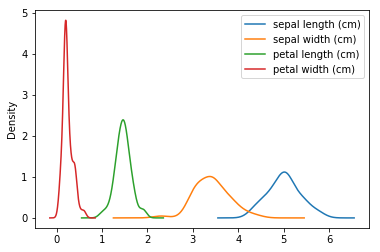

In [20]:
#citosa
import numpy as np
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

first_flower = data1[data1['target']==0]
data1 = first_flower.drop('target',axis=1)
data1.plot.density()
plt.show()

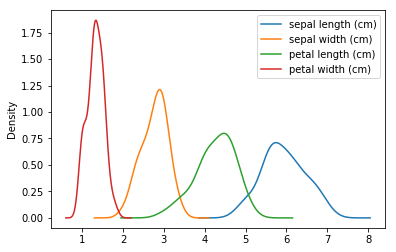

In [24]:
#veriscolor
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
second_flower = data1[data1['target']==1]
data2 = second_flower.drop('target',axis=1)
data2.plot.density()
plt.show()

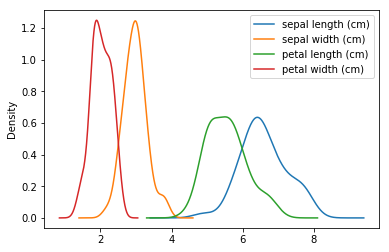

In [41]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
third_flower = data1[data1['target']==2]
data3 = third_flower.drop('target',axis=1)
data3.plot.density()
plt.show()

### Part C

In [236]:
iris_frame.columns = ['a','b','c','d']
sep_len = iris_frame.a.tolist()
sep_wid = iris_frame.b.tolist()
#print(new_sepal_len_vals)
petal_len = iris_frame.c.tolist()
petal_wid = iris_frame.d.tolist()
features = list(zip(sep_len,sep_wid,petal_len,petal_wid))

flower_type = data1.target.tolist()
clf = GaussianNB()

featuretrain,featuretest,goaltrain,goaltest = train_test_split(features,flower_type)
clf.fit(featuretrain,goaltrain)

predicted_data = clf.predict(featuretest)

cvs = cross_val_score(clf, features, flower_type, cv=10)
print(cvs)
print(np.mean(cvs))

print("Accuracy", accuracy_score(goaltest,predicted_data))

##Naieve strong assumption, Independence between variables

[ 0.93333333  0.93333333  1.          0.93333333  0.93333333  0.93333333
  0.86666667  1.          1.          1.        ]
0.953333333333
Accuracy 0.921052631579


#### Part d)

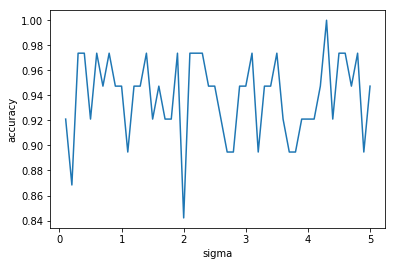

In [267]:
#print(len(petal_len))

def add_noise_loop(clean_data):
    noise_data_list = []
    accuracy_list= []
    sigma_list=[]
    noise_loop = 50
    noise_increment = 0.0
    for i in range(0,noise_loop):
        mu, sigma = 0, min(5.0,(0.1 + noise_increment)) 
        # creating a noise with the same dimension as the dataset (2,2) 
        noise = np.random.normal(mu, sigma, len(petal_len))
        
        #print(noise)
        #print(len(noise))
        
        #print(noise)
        noisy_data = clean_data + noise
        features = list(zip(sep_len,sep_wid,noisy_data,petal_wid))
        
        flower_type = data1.target.tolist()
        clf = GaussianNB()

        featuretrain,featuretest,goaltrain,goaltest = train_test_split(features,flower_type)
        clf.fit(featuretrain,goaltrain)

        predicted_data = clf.predict(featuretest)

        cvs = cross_val_score(clf, features, flower_type, cv=10)
        #print(cvs)
        #print(np.mean(cvs))

        #print("Accuracy", accuracy_score(goaltest,predicted_data))
        noise_data_list.append(noisy_data)
        accuracy_list.append(accuracy_score(goaltest,predicted_data))
        sigma_list.append(sigma)
        
        noise_increment += 5*(1/noise_loop)
    return accuracy_list,sigma_list,noise_data_list

list_a,list_b,list_c = add_noise_loop(petal_len)
#plt.density()
plt.plot(list_b,list_a)
plt.ylabel('accuracy')
plt.xlabel('sigma')
plt.show()
#plt.ylabel('accuracy')
#plt.xlabel('distance-"d"')
#plt.show()


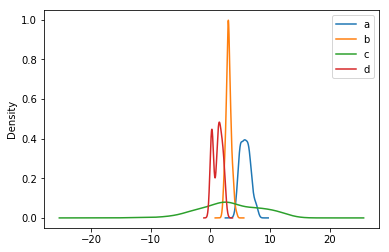

In [279]:
noise_data_sample = list_c[49]

data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['a','b','c','d'] + ['target'])

data1['c'] = noise_data_sample
data = data1.drop('target',axis=1)
data.plot.density()
 plt.show()